*Daniel Beteta Francisco*

# Métodos Avanzados en Estadística

## Estimación paramétrica


### **Ejercicio 1**

El paquete gapminder contiene un fichero de datos de población, esperanza de vida y renta per cápita de los países del mundo entre 1952 y 2007. Instala el paquete y lleva a cabo los siguientes gráficos:

In [3]:
install.packages('tidyverse')
install.packages('gapminder')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(tidyverse)
library(gapminder)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


**1. Un histograma de la esperanza de vida en 2007 de los países de Europa.**

country,lifeExp
<fct>,<dbl>
Iceland,81.757
Switzerland,81.701
Spain,80.941
Sweden,80.884
France,80.657
Italy,80.546


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



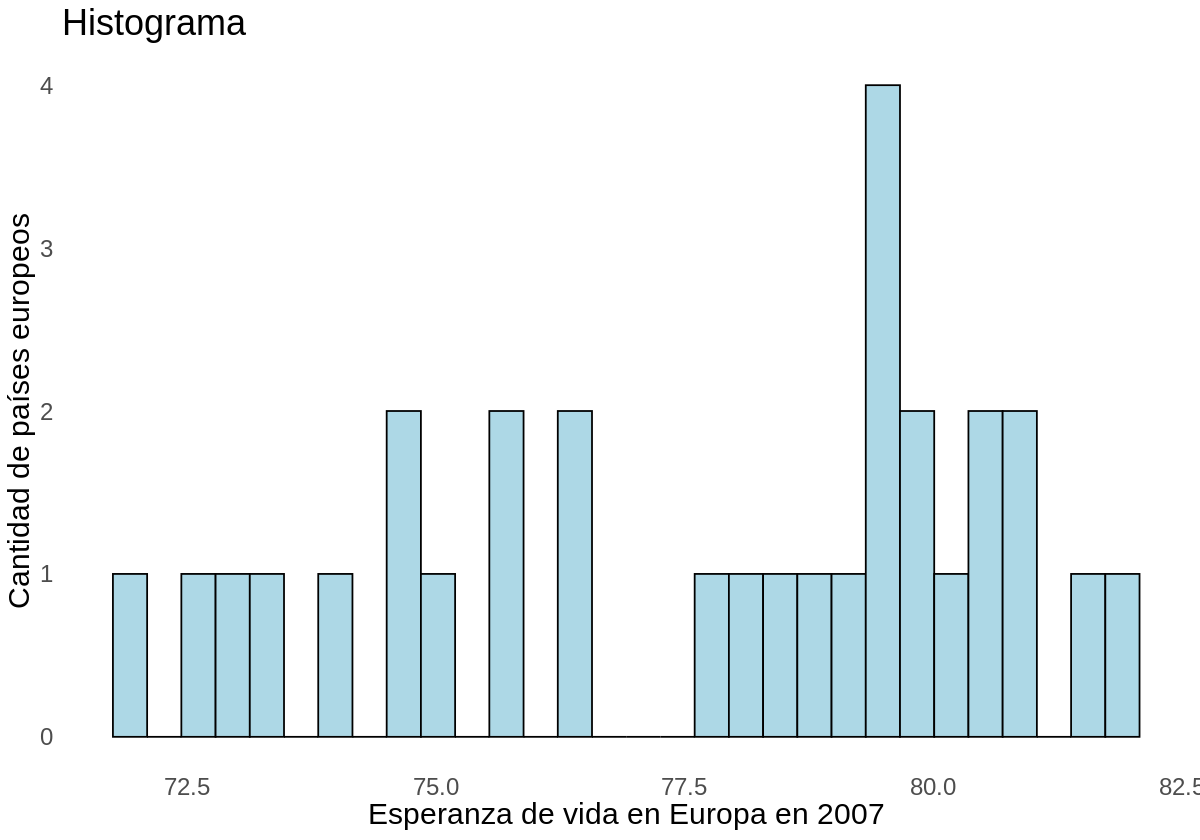

In [5]:
selection_life_exp = gapminder  %>%
                      filter(continent=='Europe' & year=='2007')  %>%
                      select(country, lifeExp)  %>%
                      arrange(-lifeExp)

head(selection_life_exp)

options(repr.plot.width=10, repr.plot.height=7)
ggplot(data=selection_life_exp) +
  geom_histogram(aes(x=lifeExp,), fill='lightblue', col='black') +
  labs(x='Esperanza de vida en Europa en 2007', y='Cantidad de países europeos', title='Histograma') +
  theme_minimal() +
  theme(panel.grid=element_blank(), text=element_text(size=18))

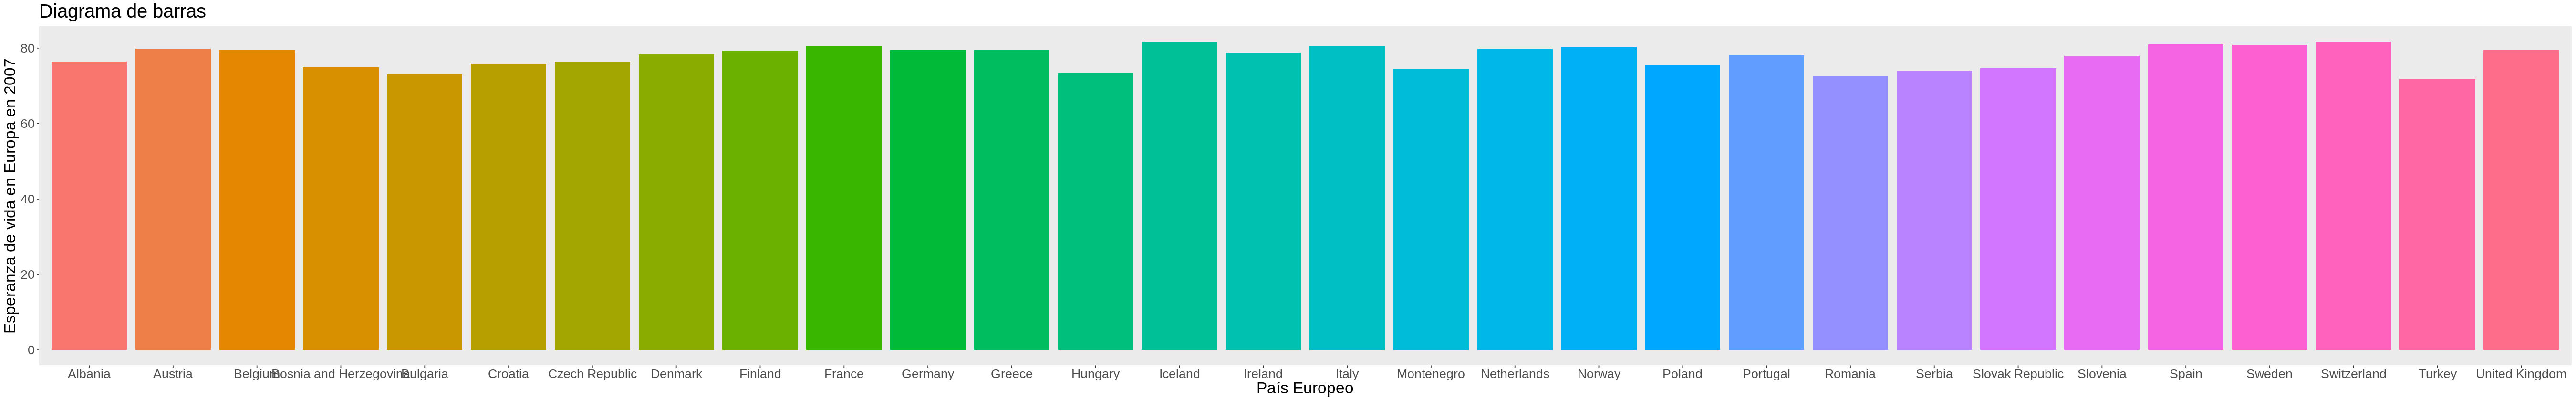

In [6]:
options(repr.plot.width=45, repr.plot.height=7)

ggplot(data=selection_life_exp, aes(x=country, y=lifeExp, fill=country)) +
  geom_bar(stat="Identity", show.legend = FALSE) +
  labs(x='País Europeo', y='Esperanza de vida en Europa en 2007', title='Diagrama de barras') +
  theme(panel.grid=element_blank(), text=element_text(size=20))

**2. Diagramas de cajas con las esperanzas de vida de cada continente en el año 1952.**

continent,lifeExp
<fct>,<dbl>
Asia,28.801
Europe,55.230
Africa,43.077
Africa,30.015
Americas,62.485
Oceania,69.120


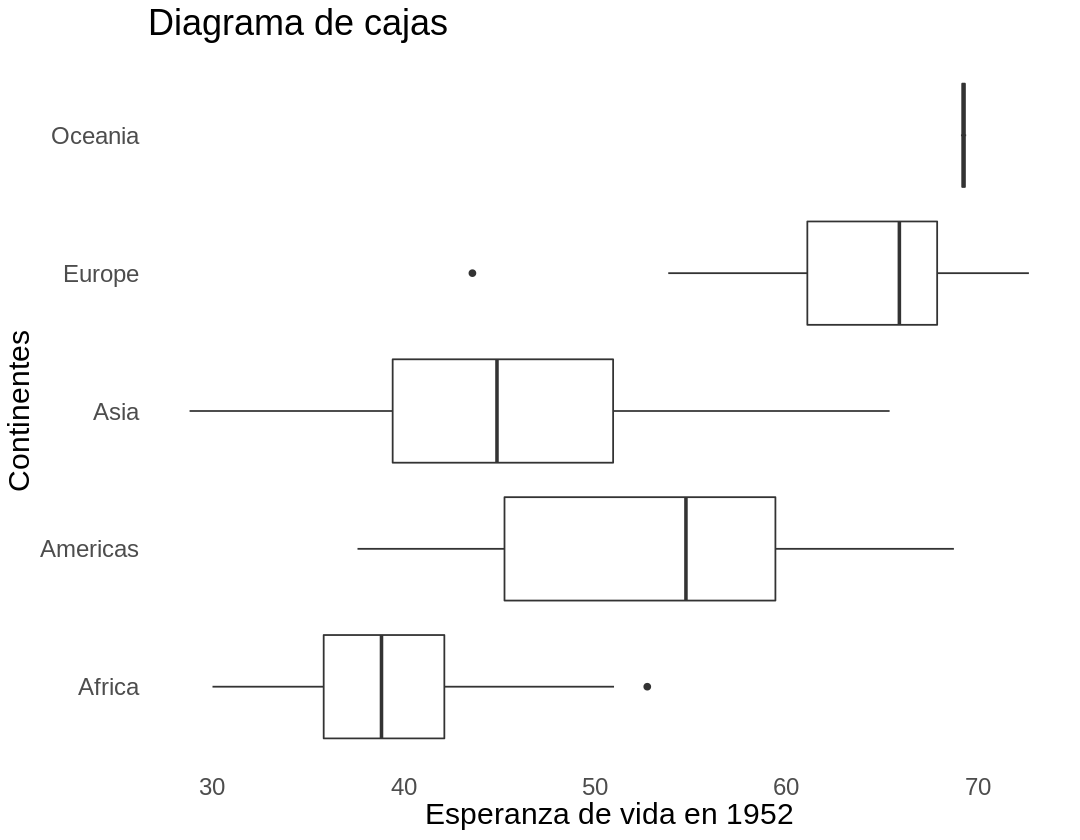

In [7]:
selection_life_exp = gapminder  %>%
                      filter(year=='1952')  %>%
                      select(continent, lifeExp)

head(selection_life_exp)

options(repr.plot.width=9, repr.plot.height=7)
ggplot(data=selection_life_exp, aes(x=lifeExp, y=continent)) +
  geom_boxplot() +
  labs(x='Esperanza de vida en 1952', y='Continentes', title='Diagrama de cajas') +
  theme_minimal() +
  theme(panel.grid=element_blank(), text=element_text(size=18))

**3. Un diagrama de dispersión de la renta per cápita y la esperanza de vida de cada país en el año 2007.**

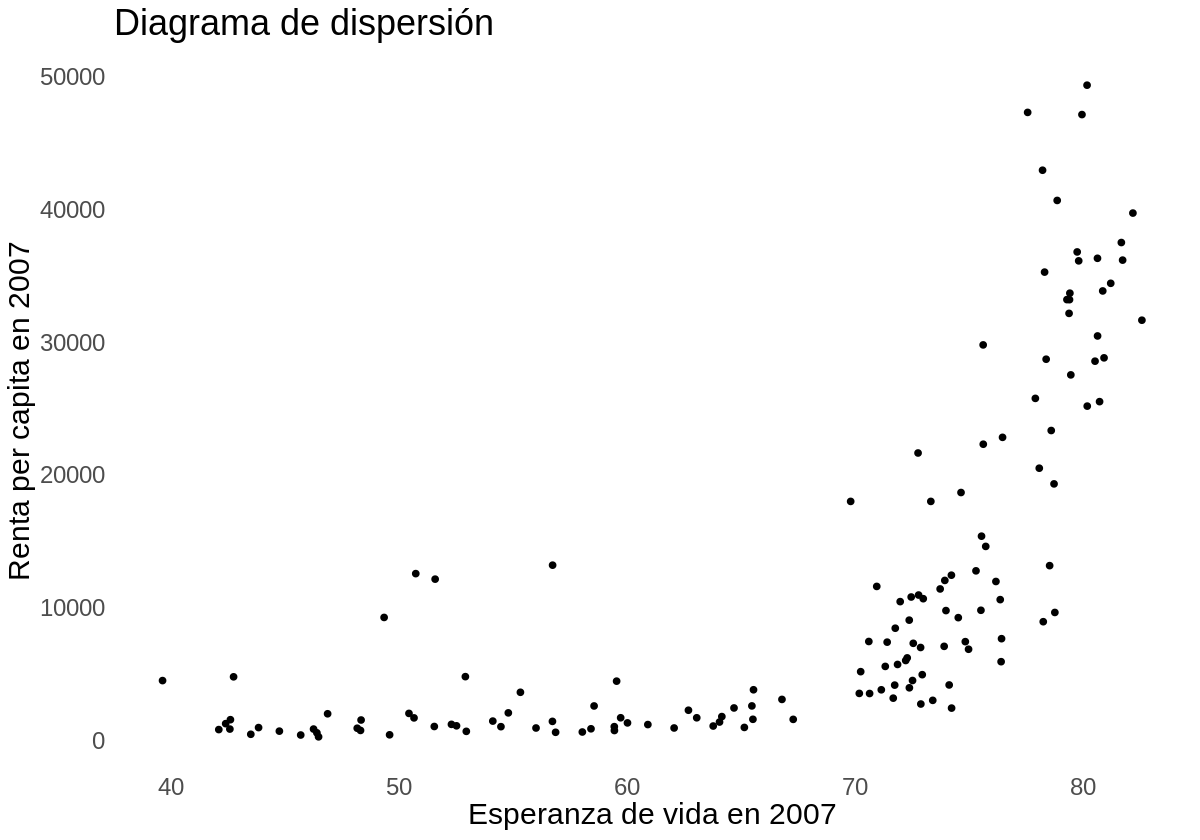

In [8]:
selection_life_exp_and_gdp = gapminder %>%
                              filter(year=='2007')  %>%
                              select(country, lifeExp, gdpPercap)

options(repr.plot.width=10, repr.plot.height=7)
ggplot(data=selection_life_exp_and_gdp, aes(x=lifeExp, y=gdpPercap)) +
  geom_point() +
  labs(x='Esperanza de vida en 2007', y='Renta per capita en 2007', title='Diagrama de dispersión') +
  theme_minimal() +
  theme(panel.grid=element_blank(), text=element_text(size=18))

**4. Mejora el gráfico anterior representando cada punto con un color diferente en función del continente al que pertenece cada país y representando la renta per cápita en una escala logarítmica**

country,continent,lifeExp,gdpPercap
<fct>,<fct>,<dbl>,<dbl>
Afghanistan,Asia,43.828,2.988818
Albania,Europe,76.423,3.773569
Algeria,Africa,72.301,3.794025
Angola,Africa,42.731,3.680991
Argentina,Americas,75.320,4.106510
Australia,Oceania,81.235,4.537005


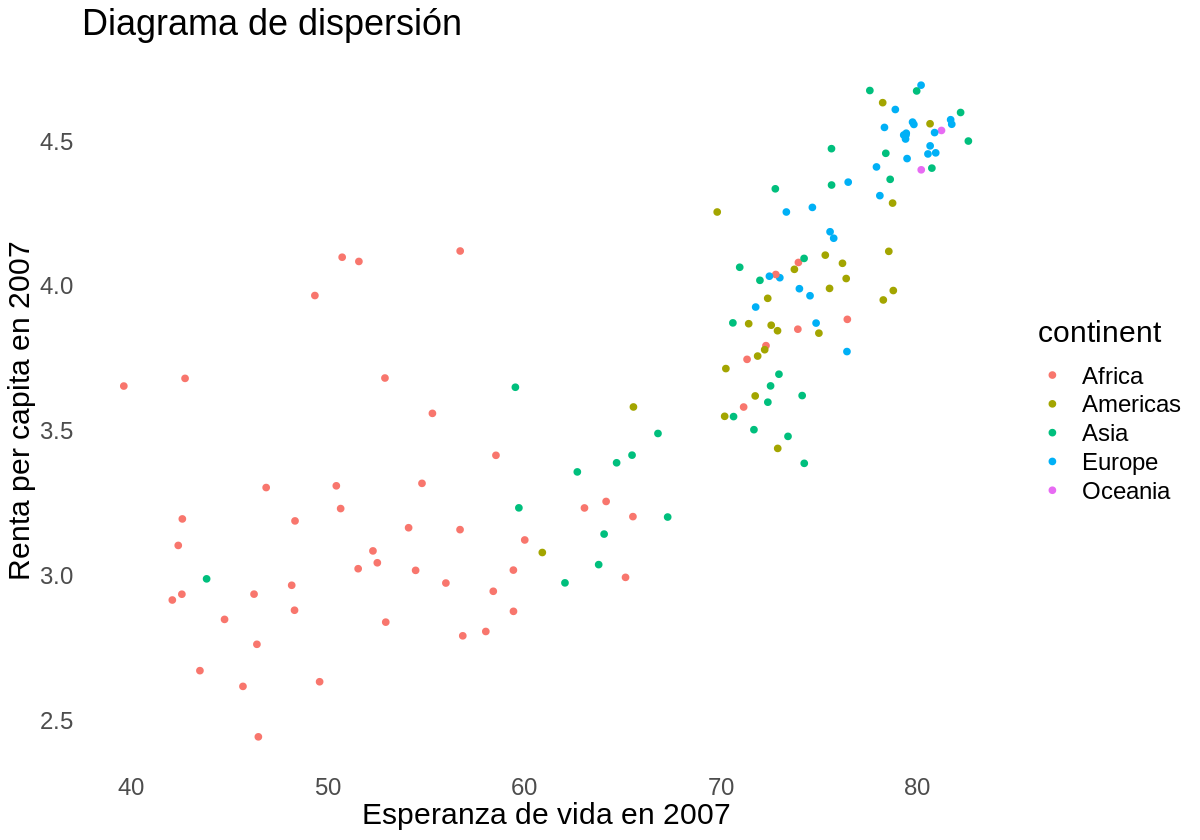

In [9]:
selection_life_exp_and_gdp = gapminder %>%
                              filter(year=='2007')  %>%
                              select(-year, -pop)   %>%
                              mutate(gdpPercap = log10(gdpPercap))

head(selection_life_exp_and_gdp)

options(repr.plot.width=10, repr.plot.height=7)
ggplot(data=selection_life_exp_and_gdp, aes(x=lifeExp, y=gdpPercap, col=continent)) +
  geom_point() +
  labs(x='Esperanza de vida en 2007', y='Renta per capita en 2007', title='Diagrama de dispersión') +
  theme_minimal() +
  theme(panel.grid=element_blank(), text=element_text(size=18))

### **Ejercicio 2**

Se desea estimar la prevalencia (proporción  de enfermos en la población) de cierto trastorno gástrico. Como la aparición de la enfermedad está relacionada con la edad, se divide la población en dos clases o estratos: (1) menores de 30 años (que constituyen el 40% de la población) y (2) mayores de 30 años (el 60% restante). Se toma una muestra de 60 individuos del estrato (1) y otra de 90 individuos del estrato (2). En total, tenemos lo que se denomina una muestra estratificada de tamaño n=150 individuos. Para cada uno de ellos se observa si tienen o no la enfermedad.

**1. A partir de p1, la proporción muestral de individuos enfermos en el estrato (1), y p2, la proporción muestral de individuos enfermos en el estrato (2), formula un estimador insesgado de la prevalencia p en la población.**

El estimador elegido es la suma ponderada de los estimadores de la proporción muestral de individuos enfermos de cada estrato. Esto es:

\begin{align*}
p = 0.4 * p1 + 0.6 * p2    
\end{align*}


Además, la proporción muestral es siempre un estimador insesgado de la proporoción poblacional. Así, se cumple que:

\begin{align*}
E[p] = E[0.4p1 + 0.6p2] = 0.4E[p1] + 0.6E[p2] = 0.4p1 + 0.6p2 = p
\end{align*}

**2. En función de p1 y p2 (las prevalencias correspondientes a cada uno de los dos estratos) calcula la varianza del estimador propuesto en el apartado anterior.**

Ya que tanto p1 como p2 son variables independientes, se puede calcular la varianza como:

\begin{align*}
Var[p] = Var[0.4p1 + 0.6p2] = Var[0.4p1] + Var[0.6p2] = 0.4^2Var[p1] + 0.6^2Var[p2]  
\end{align*}

De tal forma, y ya que la variable aleatoria sigue una distribución binomial, *X~Bin(n, p)*:

\begin{align*}
Var[p] = Var[x/n] = 1/n^2Var[x] = 1/n^2*n*p*(1-p) = 1/n * p(1-p) 
\end{align*}

Luego aplicando ambas fórmulas, se tiene:

\begin{align*}
Var[p] = 0.4^2*1/60*p1(1-p1) + 0.6^2*1/90*p2(1-p2)
\end{align*}


**3. Si p1=p2, ¿se incrementa la eficiencia por el hecho de usar una muestra estratificada en lugar de una muestra de v.a.i.i.d. de tamaño 150, extraída sin tener en cuenta los estratos (una muestra aleatoria simple)?**

En caso de usar una muestra no estratificada:

\begin{align*}
Var[p] = 1/150 * p(1-p) 
\end{align*}

En caso de usar una muestra estratificada con p1=p2:

\begin{align*}
Var[p] = 0.4^2*1/60*p1(1-p1) + 0.6^2*1/90*p1(1-p1) = (0.4^2/60 + 0.6^2/90)*p1*(1-p1) = 1/150 * p1(1-p1) 
\end{align*}

De tal forma, y sabiendo que la eficiencia es inversamente proporcional a la varianza, se puede concluir que ambas son igual de eficientes.

**4. Supongamos que diez de cada cien personas mayores de 30 años tiene la enfermedad (es decir p2=0.1). Representa gráficamente las varianzas de los estimadores correspondientes a la muestra no estratificada y a la muestra estratificada como función de p1. ¿Para qué valores de p1 es mejor utilizar muestreo estratificado en lugar de muestreo aleatorio simple?**

In [1]:
p1_values = c(0:100)/100

f_non_estratified = function(p) {
  return(1/150 * p*(1-p))
} 

var_values_non_estratified = c()
for (p1_value in p1_values) {
  var_values_non_estratified = c(var_values_non_estratified, f_non_estratified(p1_value))
}

data_non_estratified = data.frame(x=p1_values, y=var_values_non_estratified)


In [2]:
f_estratified = function(p1) {
  return(0.4^2 * 1/60 * p1*(1-p1) + 0.6^2 * 1/90* 0.1 *(1-0.1))
}

var_values_estratified = c()
for (p1_value in p1_values) {
  var_values_estratified = c(var_values_estratified, f_estratified(p1_value))
}

data_estratified = data.frame(x=p1_values, y=var_values_estratified)

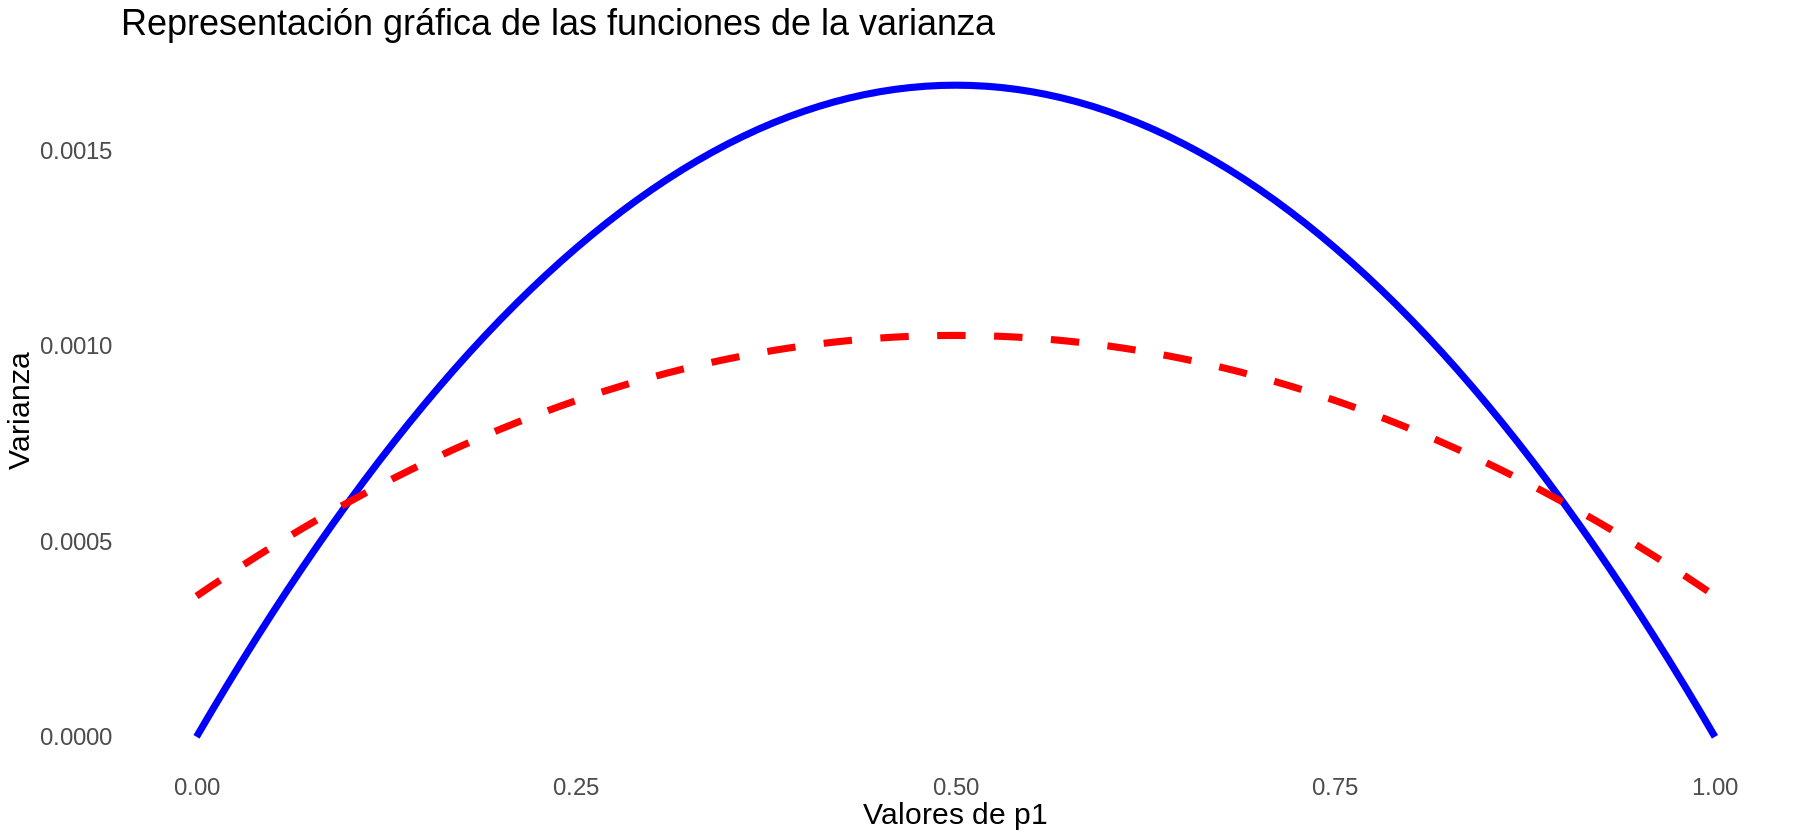

In [14]:
options(repr.plot.width=15, repr.plot.height=7)
ggplot() +
  geom_line(data=data_non_estratified, aes(x=x, y=y), linetype=1, size=2, col='blue') +
  geom_line(data=data_estratified, aes(x=x, y=y), linetype=2, size=2, col='red') +
  labs(x='Valores de p1', y='Varianza', title='Representación gráfica de las funciones de la varianza') +
  theme_minimal() +
  theme(panel.grid=element_blank(), text=element_text(size=18))

Es mejor la muestra estratificada entre el rango de valores de p1 comprendido entre 0.1 y 0.9, ya que para esos valores la varianza es menor a la de la muestra no estratificada, es decir, tiene una mayor eficiencia.

### **Ejercicio 3**

El siguiente código genera una muestra de 100 datos de una distribución de Cauchy con parámetro de posición θ:

In [11]:
set.seed(123)
theta <- 10
n <- 100
muestra <- rt(n, 1) + theta

Esta distribución tiene la siguiente función de densidad: 

\begin{align*}
f(x; θ) = (1 / π) * (1 /( 1 + (x-θ)^2))
\end{align*}

que coincide de hecho con la de una distribución  de Student con 1 grado de libertad trasladada una magnitud θ.

**1. Calcula el estimador de máxima verosimilitud de θ. ¿Se parece al valor verdadero?**

In [12]:
optimize(function(theta)-sum(dcauchy(muestra, location=theta, log=TRUE)), c(-50,50))$minimum

[1] 9.842948

Como se puede observar el resultado (9.84) es muy parecido al valor verdadero (10).

**2. Lleva a cabo algún experimento de simulación para aproximar la varianza del estimador de máxima verosimilitud.**

In [13]:
set.seed(123)
res_list = c()

f = function(muestra, theta) {
  res = 0
  for (val in muestra) {
    res = res + (2*(val-theta)) / (1+(val-theta)^2) 
  }
  return(res)
}

for (x in 1: 1000) {
  muestra <- rt(n, 1) + theta
  max_value = optimize(f,c(-50,50),muestra=muestra, maximum=TRUE)$maximum
  res_list = c(res_list, max_value)
}

var_simulated = var(res_list)
var_simulated

[1] 16.60762